> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [54]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# Check missing value
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
has_homepage               0
dtype: int64

Even `imdb_id` has na values.

In [5]:
#Check the rows without imdb_id 
df[df['imdb_id'].isna()].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0


In [6]:
#check number of rows and columns
df.shape

(10866, 21)

In [7]:
#Look at some examples of 'keywords'
df['keywords'].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [8]:
df['director'].describe()

count           10822
unique           5067
top       Woody Allen
freq               45
Name: director, dtype: object

In [9]:
#check how many movies has more than one directors
df['director'].str.contains('|',regex=False).sum()

754

In [65]:
#Check 0 budget and revenue
df.query('revenue_adj == 0 or budget_adj == 0').shape

(7011, 27)

It is hard to beleive that so many movies either do not earn any money or spend any money. So `0` in `revenue` and `budget` may mean unknown.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

After wrangling the data, it is found that the data contains many multi value columns, like `director`, `keywords`, `cast`, etc, which need to be separated before using for analysis.<br>
The data also contains free text values, `tagline` and `overview`, which needs to be transformed into other formats like `Bag of Words` before analysis. <br>

Many movies have `budget_adj` or `revenue_adj` equal `0`. `0` in this case may indicate unknown `budget_adj` and `revenue_adj` instead of no `budget` and `revenue`. 

Many Columns contains missing values. Instead of removing the missing values, I'm interested whether the missing values contains some information. In other words, does the missing values tell something about the movie? So the following data cleaning steps are to help me to understand the effect of missing values on `popularity`, `budget_adj` and `revenue_adj`.  

In [66]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#remove columns with revenue_adj==0 or budget_adj == 0
df = df.query('revenue_adj > 0 or budget_adj > 0')

In [67]:
#generate list of columns with number of missing values greater than 100 
c = df.columns.values[df.isna().sum()>100]
print(c)

['homepage' 'tagline' 'keywords' 'production_companies']


In [68]:
#Create new column names by appending '_exists' to each of the old column names
new_column = c + '_exist'
print(new_column)

['homepage_exist' 'tagline_exist' 'keywords_exist'
 'production_companies_exist']


In [69]:
#Generate a column to check whether a movie has a homepage.
for c_new, c_old in zip(new_column, c):
    df[c_new]=df[c_old].notna()

In [70]:
#Check new columns
df[new_column].head()

,homepage_exist,tagline_exist,keywords_exist,production_companies_exist
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [71]:
#Create a column to count how many 'na' a row has.
df['na_num']=df.isna().sum(axis=1)

In [72]:
#Create a list of columns which trend will be investigated.
dependent_variable = ['popularity','budget_adj', 'revenue_adj']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Does missing value on each column correspond to lower `popularity`, `budget_adj` or `revenue_adj`?

                popularity    budget_adj   revenue_adj
homepage_exist                                        
False             0.705448  2.712292e+07  6.897629e+07
True              1.351470  3.919733e+07  1.372632e+08


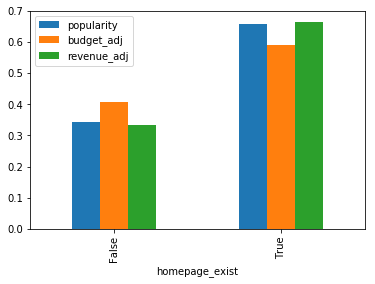

               popularity    budget_adj   revenue_adj
tagline_exist                                        
False            0.424939  1.315638e+07  1.841511e+07
True             0.981602  3.358518e+07  1.012848e+08


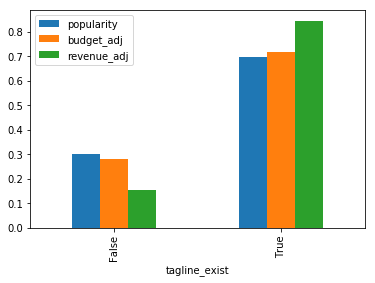

                popularity    budget_adj   revenue_adj
keywords_exist                                        
False             0.400969  1.236313e+07  1.478134e+07
True              0.947295  3.231971e+07  9.618246e+07


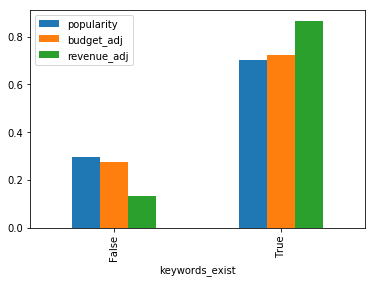

                            popularity    budget_adj   revenue_adj
production_companies_exist                                        
False                         0.243037  4.940729e+06  3.173167e+06
True                          0.930095  3.174287e+07  9.324886e+07


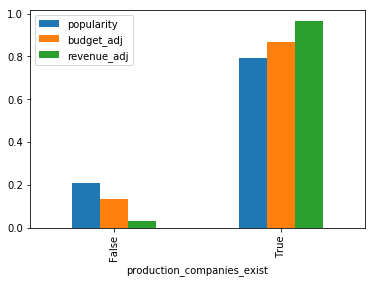

In [74]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
for column in new_column:
    n_f = df.groupby(column)[dependent_variable].mean()
    #Since values in different columns are in different scale. 
    #They have to be normalized before showing in the same chart.
    normalize_n_f = n_f / n_f.sum()
    print(n_f)
    normalize_n_f.plot.bar()
    plt.show()


The graph above show that having missing value on any of the 4 columns tends to have lower `popularity`, `budget_adj` and `revenue_adj`. 

### Research Question 2:  Is the number of missing values for a movie correlated to `popularity`, `budget_adj` or `revenue_adj`?

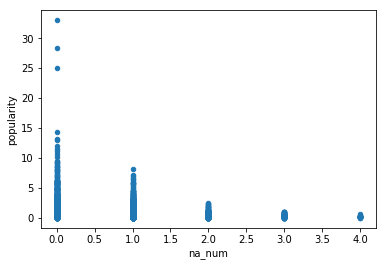

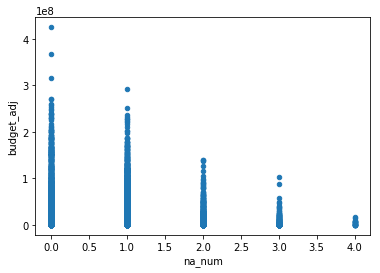

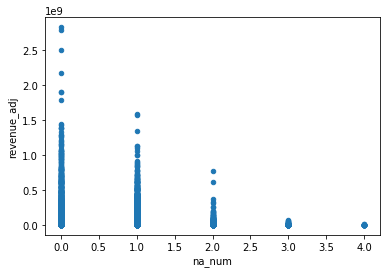

In [79]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#Plot each column against 
for column in dependent_variable:
    df.plot.scatter(x='na_num', y=column)
    plt.show()

The charts above shows that as number of missing values increase, `popularity`, `budget_adj` and `revenue_adj` decrease.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

The investigation above shows that missing values itself can contains some information. <br>
Movies with complete information are usually more popular and have larger revenue and budget. <br>
There may be some subtle reasons that a particular value is missing for a particular movie.  